In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [18]:
files = pd.read_csv('extraction.csv')
X = files.iloc[:, 2:].values
Y = files.iloc[:, 1].values

print(files)

                                             filename        tsnr       SAR  \
0      sub-qa_ses-20170515_task-rest_acq-p2_bold.json  247.676819  0.055718   
1   sub-qa_ses-20170515_task-rest_acq-p2Xs4X35mm_b...  281.640381  0.020951   
2      sub-qa_ses-20170522_task-rest_acq-p2_bold.json  259.791901  0.055695   
3   sub-qa_ses-20170522_task-rest_acq-p2Xs4X35mm_b...  279.601837  0.020943   
4      sub-qa_ses-20170530_task-rest_acq-p2_bold.json  264.461914  0.055625   
5   sub-qa_ses-20170530_task-rest_acq-p2Xs4X35mm_b...  263.224304  0.020917   
6      sub-qa_ses-20170612_task-rest_acq-p2_bold.json  288.716065  0.055458   
7   sub-qa_ses-20170612_task-rest_acq-p2Xs4X35mm_b...  291.626343  0.020854   
8      sub-qa_ses-20170619_task-rest_acq-p2_bold.json  253.758545  0.055389   
9   sub-qa_ses-20170619_task-rest_acq-p2Xs4X35mm_b...  291.835113  0.020828   
10     sub-qa_ses-20170626_task-rest_acq-p2_bold.json  277.162415  0.000000   
11  sub-qa_ses-20170626_task-rest_acq-p2Xs4X35mm_b..

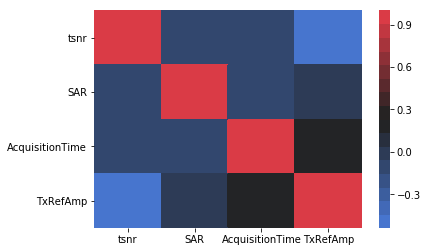

In [12]:
sns.heatmap(files.corr(), cmap=sns.diverging_palette(h_neg=256, h_pos=10, n=16, center="dark"))

In [24]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features=[2])
X = onehotencoder.fit_transform(X).toarray()

In [16]:
X = X[1:]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
y_pred = regressor.predict(X_test)
y_pred

array([263.05761854, 264.40596138, 246.43539069, 241.85535956,
       261.09473381, 253.84737875, 121.47709615, 238.4988095 ,
       248.03358686, 263.03160985, 249.40758464, 176.64177762,
       244.0861637 , 243.43055915, 247.964421  , 250.28961777])

In [28]:
print(regressor.coef_)
print(regressor.intercept_)

[  52.87399904  -28.01726389  -33.84947697   37.20591056   43.82002384
  -72.03319257 -432.98750552   32.5869492 ]
203.9218195813673


In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(y_test, y_pred)

-0.2979349573121246